floor_num:  15 

[0.00061165 0.00059928 0.0005868  0.00057592 0.00056548 0.00054972
 0.00053998 0.0005287  0.00051582 0.00050284]
popt, pcov [-3.03363027e-06  6.59475932e-04] [[ 4.42700900e-17 -1.46747753e-15]
 [-1.46747753e-15  5.43459452e-14]]
slopeOne:  6463709.890742317 with error: 14176.675834624775
%difference:  1.5029819526117594
sizeOne:  10

[0.00061407 0.0006031  0.00058901 0.00057873 0.00056427 0.00055505
 0.00054078 0.0005294  0.00051723 0.00050234]
slopeTwo:  6306334.105933093 with error: 13494.74361763159
%difference:  0.9683714520557076
sizeTwo:  10

[0.00061427 0.00060159 0.00058911 0.00057652 0.00056538 0.00055314
 0.00053948]
slopeThree:  6285250.572138793 with error: 22697.118012899
%difference:  1.299457095810414
sizeThree:  7

Average Radius: 6351764.856271401 0.25494886508478254
Average Radius error:  9990.247517326901


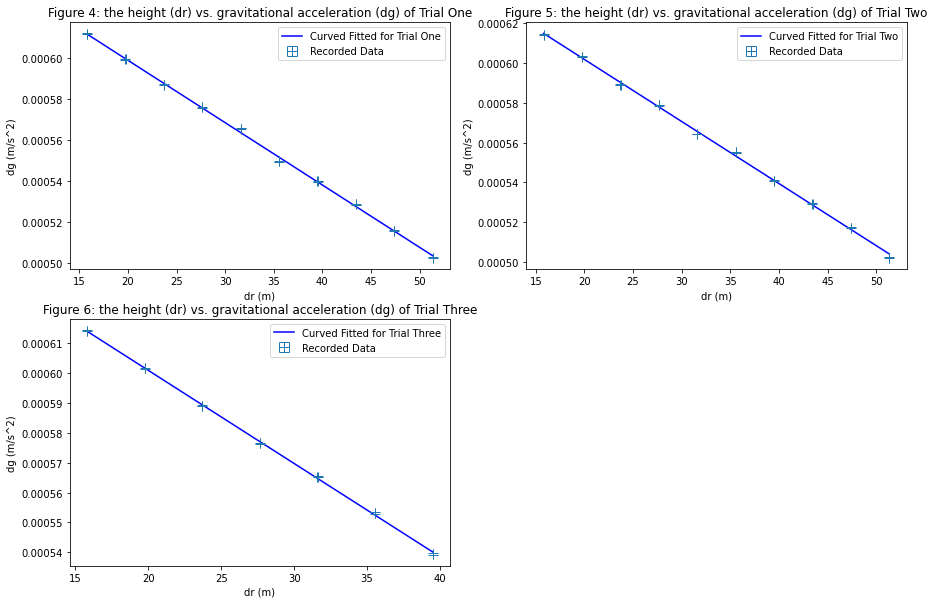

In [6]:
######### Radius of the Earth - Jason & Alex 

#########  FLOOR 4 TO 14, with floor correction
print('FLOOR 4 TO 14, with floor correction only')

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# radius of the earth 6371,000 m, 6368,000m for toronto
def func(x, m, b):
    return m*x + b

def rec_u(a, u):
    return u / a**2

floor_num, trialOne, trialTwo, trialThree = np.loadtxt(
    'data - data.csv', 
    dtype=float, skiprows=1, delimiter=',', unpack=True)

print('floor_num: ', len(floor_num), '\n')

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))
k = 0.10055
g = 9.804253
m = 2 # number of parameters in the model
expectedValue = 6368000
plt.figure(figsize=(15,10))

######################################################################
# Uncertainties
dr_msm_err = 0.01    # xerr, 0.01 measurement uncertainty
dg_msm_err =  0.2 * k / 100000     # yerr, 0.2 measurement uncertainty
# print("yerr", -(2*g*3.95)/(dg_msm_err))

######################################################################
# Trial 1
tot_u = []
corr = 0
u_sum = 0
for count in range(4, len(floor_num) - 1):
    floor = count
    reading = trialOne[count]
    corr += 6.67*10**-11 * 10**6 * \
                (1 / ((count - 2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2)
    dr[count] = floor * 3.95
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] - corr
    
    # y_error
    u1 = 1 / ((count-2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2
    u2 = (2 * (count - 2) * 0.01 / ((count - 2) * 3.95)**3) ** 2 + \
            (2 * (16 - count) * 0.01 / ((16 - count) * 3.95)**3) ** 2
    ucorrection = 10**6 * 6.67 * 10**-11 * u1 * np.sqrt(0.01 + u2 / u1**2)
    u_sum += ucorrection**2
    tot_u.append(np.sqrt(dg_msm_err**2 + u_sum))
    
dg = dg[4:-1]
dr = dr[4:-1]

print(dg)

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=tot_u, absolute_sigma=True)
print('popt, pcov', popt, pcov)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,1)
plt.plot(dr, func(dr, popt[0], popt[1]), "b-", 
         label='Curved Fitted for Trial One')
plt.xlabel("dr (m)")    
plt.ylabel("dg (m/s^2)")
plt.title("Figure 4: the height (dr) vs. gravitational acceleration (dg) of Trial One")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=tot_u, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeOne = (-2*g)/popt[0]
error1 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeOne: ',slopeOne, 'with error:', error1)
print('%difference: ', abs(slopeOne - expectedValue)/expectedValue*100)
print('sizeOne: ', len(dg))
print('')


# ######################################################################
# # Trial 2

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))
tot_u = []
corr=0
u_sum = 0
for count in range(4, len(floor_num) - 1):
    floor = count
    reading = trialTwo[count]
    corr+=  6.67*10**-11 * 10**6 * \
                (1 / ((count - 2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2)
    dr[count] = floor * 3.95
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] - corr
    
    # y_error
    u1 = 1 / ((count-2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2
    u2 = (2 * (count - 2) * 0.01 / ((count - 2) * 3.95)**3) ** 2 +\
            (2 * (16 - count) * 0.01 / ((16 - count) * 3.95)**3) ** 2
    ucorrection = 10**6 * 6.67 * 10**-11 * u1 * np.sqrt(0.01 + u2 / u1**2)
    u_sum += ucorrection ** 2
    tot_u.append(np.sqrt(dg_msm_err**2 + u_sum))
    
dg = dg[4:-1]
dr = dr[4:-1]

print(dg)

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=tot_u, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,2)
plt.plot(dr, func(dr, popt[0], popt[1]), "b-", 
         label='Curved Fitted for Trial Two')
plt.xlabel("dr (m)")
plt.ylabel("dg (m/s^2)")
plt.title("Figure 5: the height (dr) vs. gravitational acceleration (dg) of Trial Two")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=tot_u, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeTwo = (-2*g)/popt[0]
error2 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeTwo: ',slopeTwo, 'with error:', error2)
print('%difference: ', abs(slopeTwo - expectedValue)/expectedValue*100)
print('sizeTwo: ', len(dg))
print('')


# ######################################################################
# # Trial 3

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))
tot_u = []
corr = 0
u_sum = 0
for count in range(4, len(floor_num) - 1):
    floor = count
    reading = trialThree[count]
    corr += 6.67*10**-11 * 10**6 * \
                (1 / ((count - 2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2)
    dr[count] = floor * 3.95
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] - corr
    
    # y_error
    u1 = 1 / ((count-2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2
    u2 = (2 * (count - 2) * 0.01 / ((count - 2) * 3.95)**3) ** 2 + \
            (2 * (16 - count) * 0.01 / ((16 - count) * 3.95)**3) ** 2
    ucorrection = 10**6 * 6.67 * 10**-11 * u1 * np.sqrt(0.01 + u2 / u1**2)
    u_sum  += ucorrection ** 2
    tot_u.append(np.sqrt(dg_msm_err**2 + u_sum))

dg = dg[4:-4]
dr = dr[4:-4]
tot_u = tot_u[:-3]

print(dg)

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=tot_u, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,3)
plt.plot(dr, func(dr, popt[0], popt[1]), "b-", 
         label='Curved Fitted for Trial Three')
plt.xlabel("dr (m)")
plt.ylabel("dg (m/s^2)")
plt.title("Figure 6: the height (dr) vs. gravitational acceleration (dg) of Trial Three")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=tot_u, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeThree = (-2*g)/popt[0]
error3 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeThree: ',slopeThree, 'with error:', error3)
print('%difference: ', abs(slopeThree - expectedValue)/expectedValue*100)
print('sizeThree: ', len(dg))
print('')


# ######################################################################
print('Average Radius:',(slopeOne+slopeTwo+slopeThree)/3, 
      abs((slopeOne+slopeTwo+slopeThree)/3 - expectedValue)/expectedValue*100)

error_avg = math.sqrt(error1**2 + error2**2 + error3**2)/3
print('Average Radius error: ', error_avg)

plt.savefig("ROE_important_floors.png", dpi=200, transparent=False) #PNG format

# radius of the earth 6371,000 m, 6368,000m for toronto